<a href="https://colab.research.google.com/github/Saeif-Saleh/Banking-System/blob/master/classify_different_usrp_overair_175MHz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
# !pip install --upgrade tensorflow

Mon Mar 23 13:53:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/Usrps_in_175.mat')

In [4]:
print(list(matlab_data.keys())[3:])

['R2_T3_test', 'R2_T3_train', 'R2_T4_test', 'R2_T4_train', 'R2_T5_test', 'T5_train']


In [0]:
usrp3_train=matlab_data['R2_T3_train']
usrp4_train=matlab_data['R2_T4_train']
usrp5_train=matlab_data['T5_train']

In [6]:
print(usrp3_train.shape)
print(usrp4_train.shape)
print(usrp5_train.shape)

(42227312, 2)
(44468039, 2)
(47525497, 2)


In [0]:
# usrp3_train=usrp3_train.reshape(-1,2)
# usrp4_train=usrp4_train.reshape(-1,2)
# usrp5_train=usrp5_train.reshape(-1,2)
# print(usrp3_train.shape)
# print(usrp4_train.shape)
# print(usrp5_train.shape)

In [0]:
usrp3_test=matlab_data['R2_T3_test']
usrp4_test=matlab_data['R2_T4_test']
usrp5_test=matlab_data['R2_T5_test']

In [9]:
print(usrp5_test.shape)
print(usrp4_test.shape)
print(usrp3_test.shape)

(14201866, 2)
(15826335, 2)
(15493411, 2)


In [0]:
usrp3_train=usrp3_train[1000000:17777216]
usrp4_train=usrp4_train[1000000:17777216]
usrp5_train=usrp5_train[1000000:17777216]

In [0]:
usrp3_test=usrp3_test[1000000:5194304]
usrp4_test=usrp4_test[1000000:5194304]
usrp5_test=usrp5_test[1000000:5194304]

In [12]:
train_x=np.concatenate((usrp3_train,usrp4_train,usrp5_train),axis=0)
test_x=np.concatenate((usrp3_test,usrp4_test,usrp5_test),axis=0)
print(train_x.shape)
print(test_x.shape)


(50331648, 2)
(12582912, 2)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [16]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
print(seprator)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:]=2
# Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:]=2


131072


In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [18]:
print(train_x.shape)
print(train_y.shape)

(393216, 2, 128)
(393216, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
valid_x = valid_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [21]:
print(len(train_x))
print(len(valid_x))

314572
78644


In [22]:
train_x.shape

(314572, 128, 2, 1)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [24]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 314572 samples, validate on 78644 samples
Epoch 1/10
314572/314572 [==============================] - 98s 312us/sample - loss: 0.2830 - acc: 0.9060 - val_loss: 0.4849 - val_acc: 0.9432
Epoch 2/10
314572/314572 [==============================] - 92s 291us/sample - loss: 0.1245 - acc: 0.9715 - val_loss: 0.0347 - val_acc: 0.9961
Epoch 3/10
314572/314572 [==============================] - 91s 291us/sample - loss: 0.0977 - acc: 0.9797 - val_loss: 0.0224 - val_acc: 0.9969
Epoch 4/10
314572/314572 [==============================] - 91s 291us/sample - loss: 0.0771 - acc: 0.9851 - val_loss: 0.0255 - val_acc: 0.9952
Epoch 5/10
314572/314572 [==============================] - 92s 291us/sample - loss: 0.0618 - acc: 0.9881 - val_loss: 0.0166 - val_acc: 0.9988
Epoch 6/10
314572/314572 [==============================] - 92s 291us/sample - loss: 0.0561 - acc: 0.9894 - val_loss: 0.0103 - val_acc: 0.9992
Epoch 7/10

In [0]:
from sklearn.utils import shuffle
test_x,test_y=shuffle(test_x,test_y)

In [26]:
conv_model.evaluate(test_x,test_y)

98304/98304 [==============================] - 9s 96us/sample - loss: 0.0578 - acc: 0.9836


[0.0577676883965618, 0.98362225]

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def print_confusion_matrix(confusion_matrix, class_names, figsize = (5,5), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

None


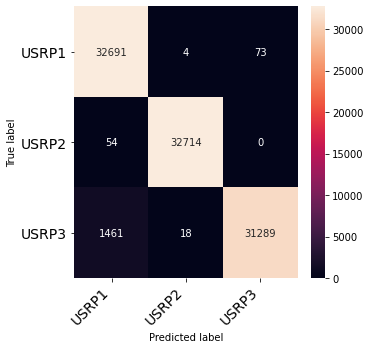

In [129]:
print(print_confusion_matrix(matrix,['USRP1','USRP2','USRP3']))

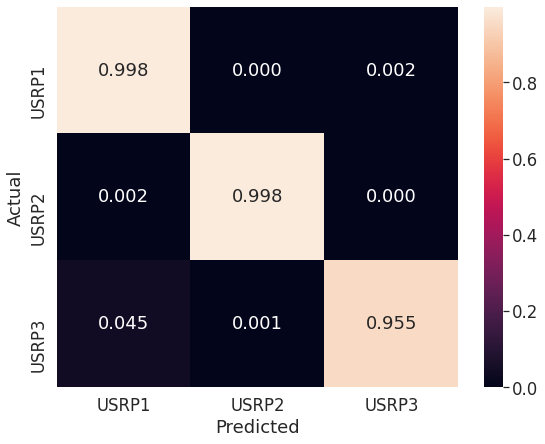

In [158]:
target_names='USRP1','USRP2','USRP3'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [155]:
from sklearn.metrics import classification_report

print(classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

       USRP1       0.96      1.00      0.98     32768
       USRP2       1.00      1.00      1.00     32768
       USRP3       1.00      0.95      0.98     32768

    accuracy                           0.98     98304
   macro avg       0.98      0.98      0.98     98304
weighted avg       0.98      0.98      0.98     98304



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


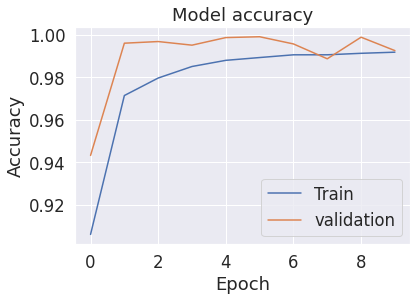

<Figure size 3600x720 with 0 Axes>

In [164]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='bottom right')
plt.figure(figsize=(50,10))
plt.show()

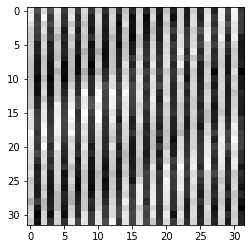

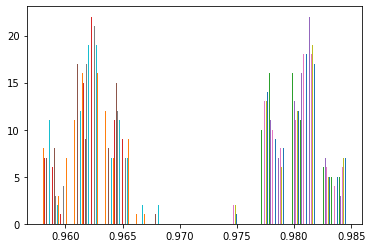

	Stdv= 0.009258
	Mean= 0.971255
	Variance= 0.000086


In [118]:
img=usrp4_train[2*1024:3*1024]   #[:1024] [1024:2*1024]  [2*1024:3*1024]
img=np.sqrt(np.power(img[:,0],2)+np.power(img[:,1],2))
img=img.reshape(32,32)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.gray()
plt.show()
plt.hist(img)
plt.show()
df=pd.DataFrame(img.flatten())
print('\033[1m\tStdv={}'.format(df.std().to_string(index=False)))
print('\tMean={}'.format(df.mean().to_string(index=False)))
print('\tVariance={}'.format(df.var().to_string(index=False)))


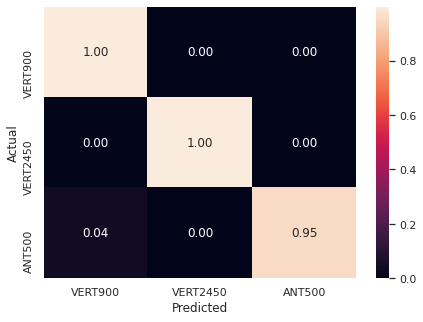

In [0]:
while True:
  pass